# Info 113 Introduction to Data Science
## Homework 1: VI-ME-BA-BAR

In [1]:
# Load general libraries
import os, re
from glob import glob as ls
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
from PIL import Image
%load_ext autoreload
%autoreload 2

# Step 1: {VI}sualization and data preprocessing 
At this stage we do not expect you to be able to write the code that we give you in the next two cells, but check it out and try to understand it.

In [2]:
def get_files(datadir, type = 'a'):
    ''' Function that gets all the files as a list. '''
    file_list = list()
    for root, dirs, files in os.walk(datadir):
        for name in files:
            if not re.search('.ipynb|.DS_Store', name) and re.search(type, name):
                file_list.append(os.path.join(root, name))
    return file_list

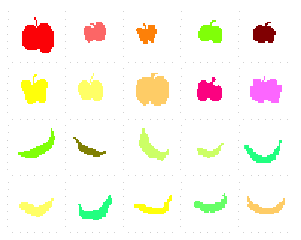

In [3]:
data_dir = './mini-dataset'
a_files = get_files(data_dir, 'a')
b_files = get_files(data_dir, 'b')
columns = 5
rows = len(a_files+b_files)/columns
fig=plt.figure(figsize=(columns, rows))
k=1
for filename in a_files+b_files:
    img=Image.open(filename)
    fig.add_subplot(rows, columns, k)
    plt.imshow(img) 
    plt.tick_params(axis='both', labelsize=0, length = 0)
    plt.grid(b=False)
    k=k+1

## Preprocessing
Data often come already in a feature representation, but not always. As an exercise, we are going to guide you through a simple feature extraction process.

### Question 1: Load an image
Create a variable called `apple_example` and assign it the name of the file file in the list `a_files`. Then create a variable `img` and assign it the corresponding image read from that file. Finally, assign to two variables `width` and `height` the dimension of the image. Print `width` and `height`.

In [4]:
# Solution of question 1
apple_example = a_files[0]
img=Image.open(apple_example)
width, height = img.size
print(width, height)

32 32


### Question 2: Coersion of images as numpy arrays
Create a variable called `M` and assign it a numpy array containing `img`. Assign to three variables `imw`, `imh`, `nchannels` the dimensions (shape) of `M`. Then print `imw`, `imh`, and `nchannels`. You will notice that there are 4 channels, what are those channels? Try to remember or check your class notes.

In [5]:
# Solution of question 2
M = np.array(img)
imw, imh, nchannels = M.shape
print(imw, imh, nchannels)

32 32 4


### Question 3: Foreground and background colors
Show the image `img`. Check that the dimension is consistent with `width` and `height`. Then, examine the colors of the foreground and the background: (1) assign to variables `fg_r`, `fg_g`, `fg_b`, and `fg_a` the channel values of `M[15, 15]`. Print `fg_r`, `fg_g`, `fg_b`, and `fg_a`. (2) assign to variables `bg_r`, `bg_g`, `bg_b`, and `bg_a` the channel values of `M[0, 0]`. Print `bg_r`, `bg_g`, `bg_b`, and `bg_a`. 
Does the color of the apple match the foreground color?

251 2 7 255
255 255 255 255


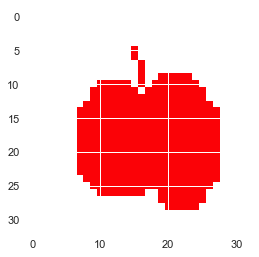

In [6]:
# Solution of question 3
plt.imshow(M)
fg_r, fg_g, fg_b, fg_a = M[15, 15]
print(fg_r, fg_g, fg_b, fg_a)
bg_r, bg_g, bg_b, bg_a = M[0, 0]
print(bg_r, bg_g, bg_b, bg_a)

### Question 4: Separate color channels
Define three arrays of type `float` named `R`, `G`, and `B`, containing the red, green and blue channels respectively (for all pixels) Then define an array `D` (color difference) containing `R-(G+B)/2` and an array `V` (value of intensity) containing `(R+G+B)/3`.

In [7]:
# Solution of question 4
R = 1.*M[:,:,0]; G = 1.*M[:,:,1]; B = 1.*M[:,:,2]
D = R-(G+B)/2
V = (R+G+B)/3

### Question 5: Extraction of the `redness` feature
Create a variable `redness` containing the average (mean) of `D` for the foreground pixels. Hint: the background pixels have a value intensity of `255` (white). Check that your definition of redness matches `fg_r - (fg_g + fg_b)/2`. As a side question: try to define `whiteness = bg_r - (bg_g + bg_b)/2`. Why do you get an error? Why did you get no error for `fg_r - (fg_g + fg_b)/2`? How can you do this "right"? Hint: rgb channels are defined as `intergers`.

In [8]:
# Solution of question 5
redness = np.mean(D[V!=255])
print(redness)
assert(redness == fg_r - (fg_g + fg_b)/2)

246.5


### Question 6: Extraction of the `elongation` feature
Create two mean vectors `V0` and `V1` by averaging (taking the mean) of `V` along axis 0 and axis 1 respectively. Then use this line of code `V0_idx = [i for i in range(imw) if V0[i]!=255]` to get the indices of the values that are not white along axis 0 (horizontal). Similarly write code to extract `V1_idx` (pixels not white along axis 2, vertical). Extract for thos information the witdth `w` and the height `h` of the apple. Visuallt check that the width and height are correct. Finally compute the `elongation` variable (aspect ratio) as `w/h`.

In [9]:
# Solution of question 6
V0 = np.mean(V, axis=0)
V1 = np.mean(V, axis=1)
V0_idx = [i for i in range(imw) if V0[i]!=255]
V1_idx = [i for i in range(imh) if V1[i]!=255]
w = max(V0_idx)-min(V0_idx)
h = max(V1_idx)-min(V1_idx)
elongation = w/h 
print(w, h, elongation)

20 23 0.8695652173913043


### Question 7: Function `extract_features`
Write a function with `M` as an input argument and that takes all the steps we walked you through, then returns `redness` and `elongation` as a list. You will use the following template:

    def extract_features(M, verbose = True):
    # Put your code here.
    # verbose is just a flag you can use to comment out print statements needed to debug your code
    return [redness, elongation]

In [10]:
# Solution of question 7
def extract_features(M, verbose = True):
    '''Take a RGBA numpy array M as input 
    and return two features of the foreground: 
    redness and elongation.'''
    R = 1.*M[:,:,0]; G = 1.*M[:,:,1]; B = 1.*M[:,:,2]
    D = R-(G+B)/2
    V = (R+G+B)/3
    imw, imh = V.shape
    redness = np.mean(D[V!=0])
    if verbose: print('redness={0:5.2f}'.format(redness))
    V0=np.mean(V, axis=0)
    V1=np.mean(V, axis=1)
    V0_idx = [i for i in range(imw) if V0[i]!=255]
    V1_idx = [i for i in range(imh) if V1[i]!=255]
    w = max(V0_idx)-min(V0_idx)
    h = max(V1_idx)-min(V1_idx)
    elongation = w/h
    if verbose: print('elongation={0:5.2f}'.format(elongation))
    return [redness, elongation]

## Preprocess and visualize all the data
At this stage we do not expect you to be able to write the code that we give you in the next few cells, but check it out and try to understand it.

In [11]:
# Create matrices Xtrain, Xtest, Ytrain, and Ytest
# The classe Apple is coded as 1 and the class Banana as -1
verbose = False
n = len(a_files)
_Xtrain = np.zeros([n, 2])
Ytrain = np.zeros([n, 1])
_Xtest = np.zeros([n, 2])
Ytest = np.zeros([n, 1])
for k in range(n):
    if verbose: print(a_files[k])
    img=Image.open(a_files[k])
    M = np.array(img)
    if k%2!=0:
        i = int((k-1)/2.)
        if verbose: print('train {}'.format(i))
        _Xtrain[i, :] = extract_features(M, verbose)
        Ytrain[i] = 1
    else:
        i = int(k/2.)
        if verbose: print('test {}'.format(i))
        _Xtest[i,:] = extract_features(M, verbose)
        Ytest[i] = 1
for k in range(n):
    if verbose: print(b_files[k])
    img=Image.open(b_files[k])
    M = np.array(img)
    if k%2!=0:
        i = int(n/2. + (k-1)/2.)
        if verbose: print('train {}'.format(i))
        _Xtrain[i, :] = extract_features(M, verbose)
        Ytrain[i] = -1
    else:
        i = int(n/2. + k/2.)
        if verbose: print('test {}'.format(i))
        _Xtest[i, :] = extract_features(M, verbose)
        Ytest[i] = -1

In [12]:
# For better rendering and improved results, the features are standardized.
# This means that for each column vector we subtract the mean and divide by the standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
Xtrain = scaler.fit_transform(_Xtrain)
# We apply the preprocessing transformation on test data with parameters learned on training data
Xtest = scaler.transform(_Xtest)

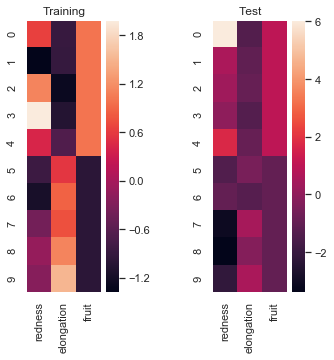

In [13]:
# Plot data as heat maps
XY_train = pd.DataFrame(np.append(Xtrain, Ytrain, axis=1), columns=['redness', 'elongation', 'fruit'])
XY_test = pd.DataFrame(np.append(Xtest, Ytest, axis=1), columns=['redness', 'elongation', 'fruit'])
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(wspace=1)
ax_tr = fig.add_subplot(1, 2, 1)
sns.heatmap(XY_train)
ax_tr.title.set_text('Training')
ax_te = fig.add_subplot(1, 2, 2)
sns.heatmap(XY_test)
ax_te.title.set_text('Test')

TRAINING


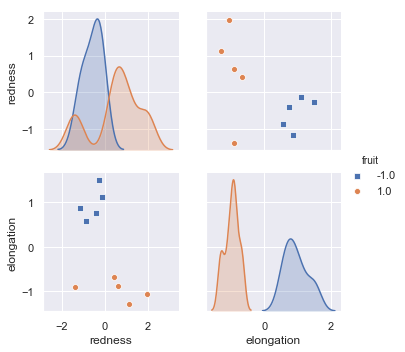

In [14]:
# Make scatter plots
print('TRAINING')
sns.pairplot(XY_train, vars=['redness', 'elongation'], hue='fruit', markers=["s", "o"])

TEST


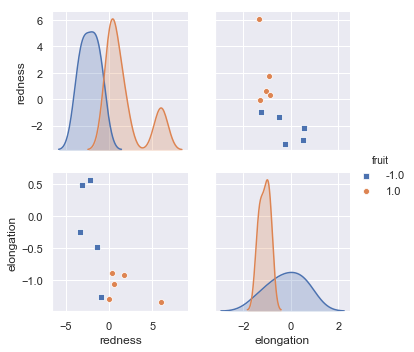

In [15]:
print('TEST')
sns.pairplot(XY_test, vars=['redness', 'elongation'], hue='fruit', markers=["s", "o"])

# Step 2: {ME}tric definition

### Question 8: Error rate
Write a function that implements the error rate metric. Follow this template:

    def error_rate(solution, prediction):
    # Put your code here.
    return e
    
Then write unit tests what check that the error rate between `solution=Ytrain` and `prediction=Ytrain` is zero, that between `solution=Ytrain` and `prediction=np.zeros(Ytrain.shape)` is one and the between `solution=Ytrain` and `prediction=np.ones(Ytrain.shape)` is 0.5.

In [16]:
# Solution to question 8
def error_rate(solution, prediction):
    '''Compute the error rate between two vectors.'''
    e = np.mean(solution!=prediction)
    return e

assert(error_rate(Ytrain, Ytrain) == 0)
assert(error_rate(Ytrain, np.zeros(Ytrain.shape)) == 1)
assert(error_rate(Ytrain, np.ones(Ytrain.shape)) == 0.5)

### Question 9: Accuracy score
The library `scikit_learn` also called `sklearn` has a function `accuracy_score`. Check that `error_rate` = `1-accuracy_score` using the same examples as above. As part of this question you need to first figure out how to import the function `accuracy_score`. Look this up on the Internet.

In [17]:
# Solution to question 9
from sklearn.metrics import accuracy_score
assert(error_rate(Ytrain, Ytrain) == 1-accuracy_score(Ytrain, Ytrain))
assert(error_rate(Ytrain, np.zeros(Ytrain.shape)) == 1-accuracy_score(Ytrain, np.zeros(Ytrain.shape)))
assert(error_rate(Ytrain, np.ones(Ytrain.shape)) == 1-accuracy_score(Ytrain, np.ones(Ytrain.shape)))

# Step 3: {BA}seline results
The 1-nearest neighbor classifier is a nice and simple method. Luckily it is implemented in `scikit-learn`. You may also want to implement it yourself as part of your project.

### Question 10: 1-nearest-neighbor classifier
Import the `KNeighborsClassifier` classifier from `scikit-learn`. Set the number of neighbors to one. Train a model with `Xtrain` by calling the method `fit`. Then use the trained model to create two vectors of prediction `Ytrain_predicted` and `Ytest_predicted` by calling the method `predict`. Compute `e_tr`, the training error rate, and `e_tr` the test error rate.

WARNING: `scikit-learn` uses lists for prediction labels instead of column vectors. You will have to replace `Ytrain` by `Ytrain.ravel()` and `Ytest` by `Ytest.ravel()` to avoid an error message and wrong error rates.

In [18]:
# Solution to question 10
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(scaler.fit_transform(Xtrain), Ytrain.ravel()) 
Ytrain_predicted = neigh.predict(Xtrain)
Ytest_predicted = neigh.predict(Xtest)
e_tr = error_rate(Ytrain.ravel(), Ytrain_predicted)
e_te = error_rate(Ytest.ravel(), Ytest_predicted)
print(e_tr, e_te)

0.0 0.3


### Question 11: Confusion matrix
Extract the variables `tn`, `fp`, `fn`, `tp` (true negative, false positive, false negative, and true positive) using the `confusion_matrix` function of `scikit_learn`, for test data predictions.

In [19]:
# Solution to question 11
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Ytest.ravel(), Ytest_predicted).ravel()
print(tn, fp, fn, tp)

2 3 0 5


# Step 4: {BAR}s of error and test set size
Last but not least let us evaluate the significance of our results bu computing error bars. Obviously, since we have only 10 test examples, we cannot see at least 100 errors (which is the target we gave to ourselves in class). But this is only a toy example.

### Question 12: Test set error bar
Compute the 1=sigma error bar of e_te using the standard error formula defined in class. How many test examples would we need to divide this error bar by a factor of two?

In [20]:
# Solution to question 12
n_te = len(Ytest)
sigma = np.sqrt(e_te * (1-e_te) / n_te)
print(sigma)

0.14491376746189438
